<a href="https://colab.research.google.com/github/aloocoder/learn_pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seting up the notebook

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#chekc for the pytorch version

torch.__version__

'2.3.1+cu121'

### data (preparign and loading)

##### we'll use a linear regression formula to make a striaght line with *known* **parameteres**

In [ ]:
#known parameters
weight = 0.9
bias = 0.3

#create data-points
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = X*weight + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3180],
         [0.3360],
         [0.3540],
         [0.3720],
         [0.3900],
         [0.4080],
         [0.4260],
         [0.4440],
         [0.4620]]))

In [ ]:
len(X), len(y)

(50, 50)

####splitting the data into train and test set

In [ ]:
train_split = int(len(X)*0.8)
X_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

#### visualizing the data

In [ ]:
def plot_predictions(train_data = X_train,
                     test_data = x_test,
                     train_labels = y_train,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize = (10,7))

  #plot the train data
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'training_data')

  #plot the test data
  plt.scatter(test_data, test_labels, c= 'g', s = 4, label = 'test_data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c = 'r', s = 4, label = "predictions")

  plt.legend(fontsize = 14)



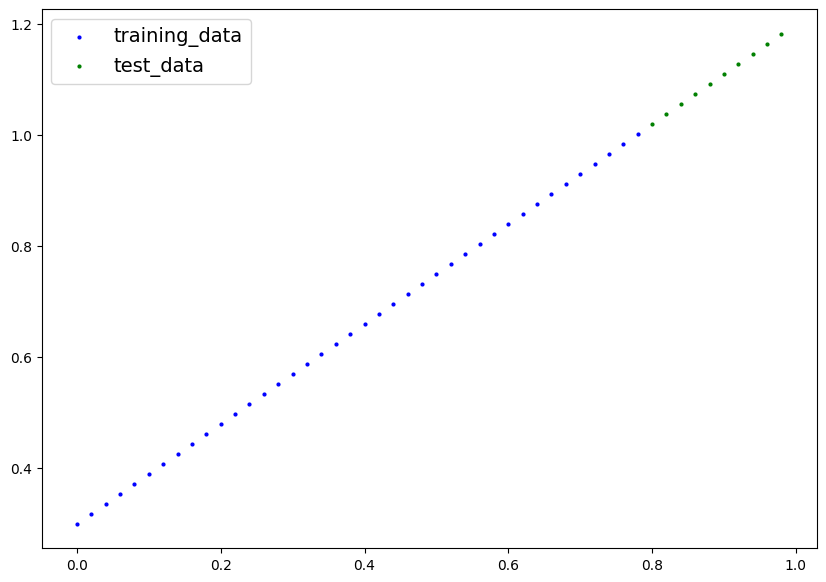

In [ ]:
plot_predictions()

##buildin the first pytorch model

In [ ]:
from torch import nn

# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

  # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

####getting the contents in side the model

this can be done using the .parameters method

In [ ]:
#create a random seed

torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#list named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode(): ##stops tracking the gradient as it is not required for makig predictions
  y_pred  = model_0(x_test)

##can also be done with

# with torch.no_grad():
#   y_pred = model_0(x_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

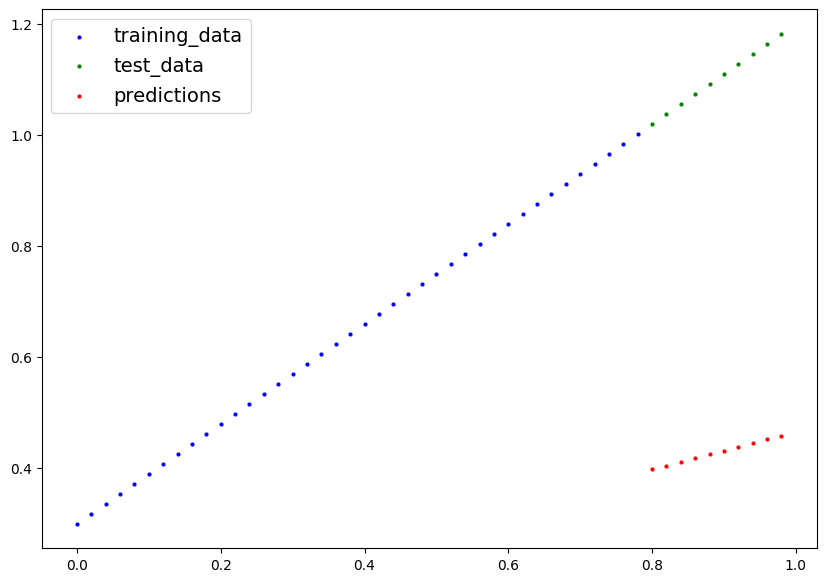

In [ ]:
plot_predictions(predictions = y_pred)

####training the model

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#set up a loss function
loss_fn = nn.L1Loss() #mean absolute error

#set up an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

####building a training loop in pytorch

In [ ]:
#set the epoch -> an epoch is one pass throught the data
epochs = 100

epoch_count = []
loss_values = []
test_loss_values = []

#training
for epoch in range(epochs):

  #set the model on traning mode
  model_0.train()

  #do the forward pass
  y_pred = model_0(X_train)

  #calculte the loss
  loss = loss_fn(y_pred, y_train)
  #optimizer zero grad -> start fresh
  optimizer.zero_grad()

  #perform back propogation
  loss.backward()

  #perform gradient descent -> set up the optimizer
  optimizer.step()

  #testing code
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(x_test)

    #calc loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"epoch: {epoch} | loss: {loss} | test_loss: {test_loss}")

epoch: 0 | loss: 0.39088135957717896 | test_loss: 0.6590651273727417
epoch: 10 | loss: 0.2756713330745697 | test_loss: 0.5243551731109619
epoch: 20 | loss: 0.16460572183132172 | test_loss: 0.3926808834075928
epoch: 30 | loss: 0.10852336883544922 | test_loss: 0.2989806532859802
epoch: 40 | loss: 0.08743593096733093 | test_loss: 0.24060264229774475
epoch: 50 | loss: 0.07890807092189789 | test_loss: 0.20496833324432373
epoch: 60 | loss: 0.07424996793270111 | test_loss: 0.18382300436496735
epoch: 70 | loss: 0.07052046060562134 | test_loss: 0.17009106278419495
epoch: 80 | loss: 0.06703047454357147 | test_loss: 0.15907101333141327
epoch: 90 | loss: 0.06354047358036041 | test_loss: 0.1480509340763092


In [ ]:
weight, bias

(0.9, 0.3)

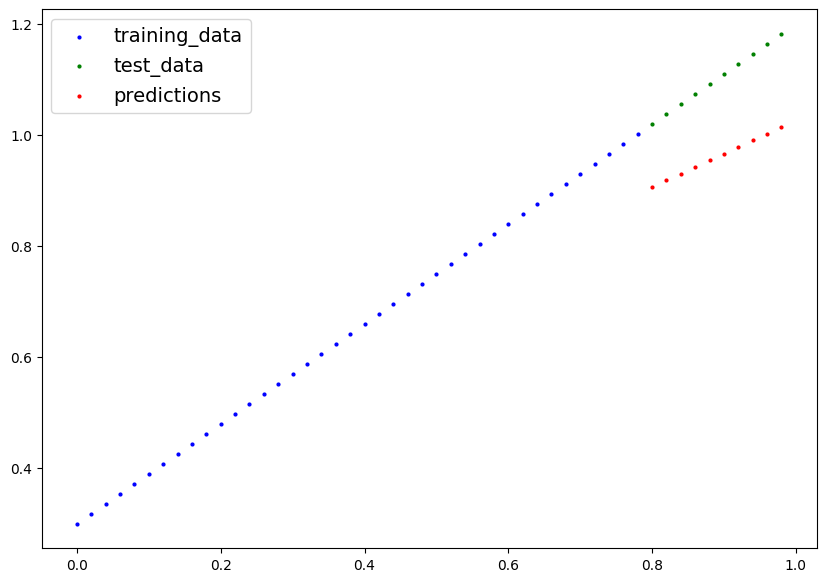

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(x_test)

plot_predictions(predictions=y_pred_new)


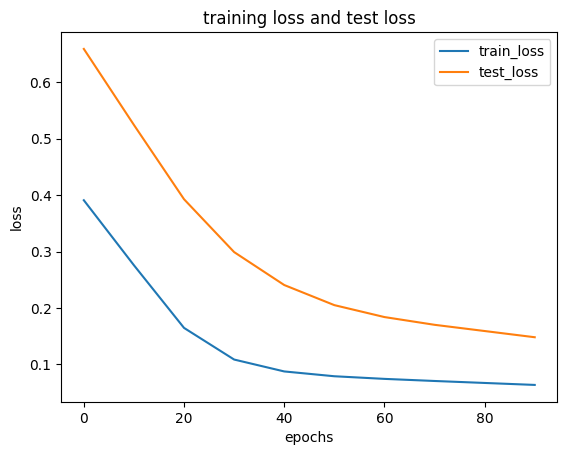

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "train_loss")
plt.plot(epoch_count, test_loss_values, label = "test_loss")
plt.title("training loss and test loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

###saving a model in pytorch

1. `torch.save()` saved in pickle model
2.  `torch.load()` load a saved pytorch object
3. `torch.nn.module.state_dict()` load a models saved state dict

In [ ]:
#saving a pytorch model

from pathlib import Path

# create a model dictionary
model_path = Path("models")
model_path.mkdir(parents = True, exist_ok=  True)

#creta a model save path
model_name = "01_pytorch_workflow_model_1.pth"
model_save_path = model_path / model_name

#save the model state_dict
print(f"saving the model to {model_save_path}")
torch.save(obj= model_0.state_dict(),
           f = model_save_path)

saving the model to models/01_pytorch_workflow_model_1.pth


###loading the savd model

In [ ]:
##loading a saved state dict

#create a new instance of the model
load_model_0 = LinearRegressionModel()

load_model_0.load_state_dict(torch.load(f = model_save_path))

load_model_0.state_dict()

OrderedDict([('weights', tensor([0.6009])), ('bias', tensor([0.4253]))])

In [ ]:
y_preds = model_0(x_test)
y_preds

tensor([[0.9060],
        [0.9181],
        [0.9301],
        [0.9421],
        [0.9541],
        [0.9661],
        [0.9781],
        [0.9902],
        [1.0022],
        [1.0142]], grad_fn=<AddBackward0>)

In [ ]:
##check if it is loaded correcylt\

load_model_0.eval()

with torch.inference_mode():
  load_preds = load_model_0(x_test)

y_preds == load_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##putting it all toegther

###setting up a  device agnostic code

In [ ]:
#set up the code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cpu


###create data

In [ ]:
weight = 0.9
bias  = 0.1

#create a range of values
start = 0
end = 1
step  = 0.02

X = torch.arange(start,end,step).unsqueeze(dim = 1)
Y = X*weight + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1000],
         [0.1180],
         [0.1360],
         [0.1540],
         [0.1720],
         [0.1900],
         [0.2080],
         [0.2260],
         [0.2440],
         [0.2620]]))

In [ ]:
#split data

train_split = int(len(X)*0.8)
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [ ]:
#plot the data
def plot_predictions(train_data, test_data, train_labels, test_labels,predictions = None):
  plt.figure(figsize = (10,7))

  #plot train data
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "train_data")

  #plot the test data
  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "test_data")

  #plot the predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "predictions")


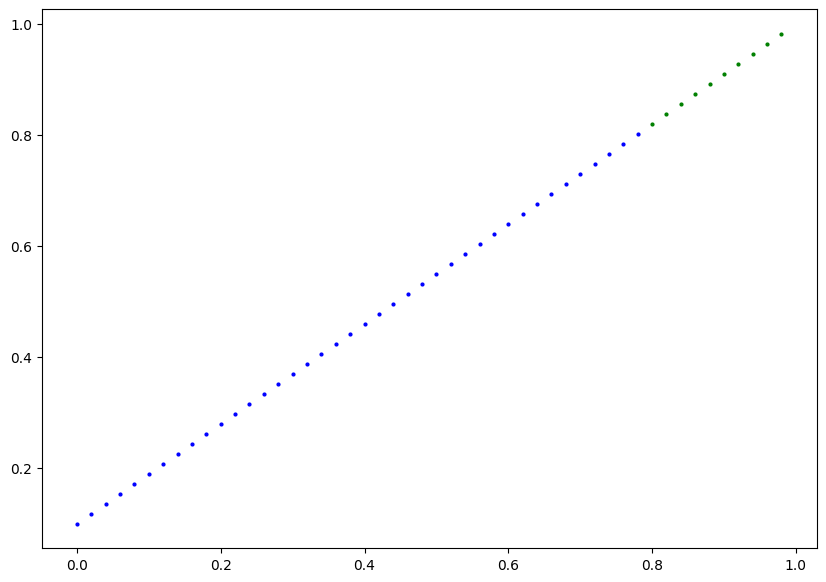

In [ ]:
plot_predictions(X_train, X_test, Y_train, Y_test)

In [ ]:
#buidin the pytorch linera model

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # not required to self intialize thwe weights
        # self.weights = nn.Parameter(torch.randn(1,
        #                                         dtype = torch.float),
        #                             requires_grad = True)

        # self.bias = nn.Parameter(torch.randn(1,
        #                                      dtype = torch.float),
        #                                      requires_grad = True)

        ##use the nn.Linear for creating the parametsr
        self.Linear_layer = nn.Linear(in_features = 1,
                                      out_features = 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.Linear_layer(x)


In [ ]:
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()

list(model_1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [ ]:
model_1.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.7645]])),
             ('Linear_layer.bias', tensor([0.8300]))])

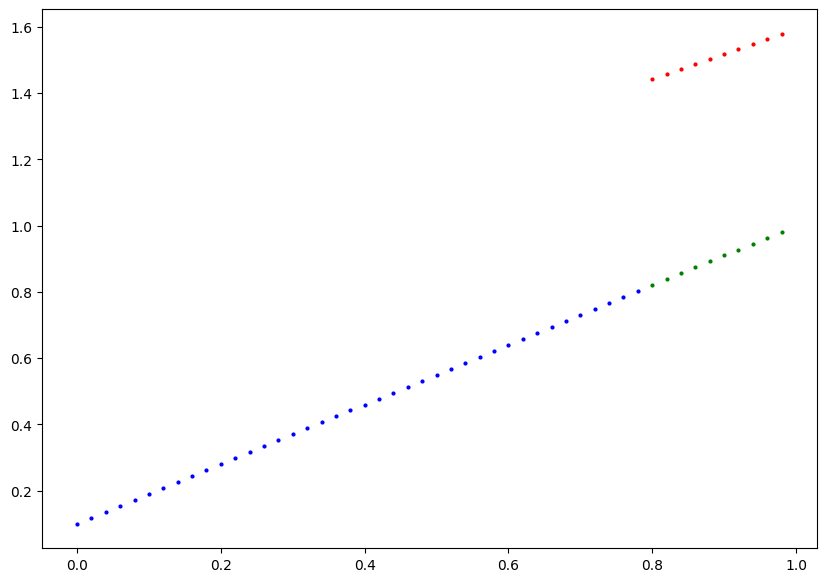

In [ ]:
#initial predictions

with torch.inference_mode():
  y_preds = model_1(X_test)


plot_predictions(X_train, X_test, Y_train, Y_test, predictions = y_preds)

In [ ]:
#seetup loss function and optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [ ]:
#check the model device
next(model_1.parameters()).device


device(type='cpu')

In [ ]:
#set the model t0 the targeted device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
## the training loop
## the training loop

epochs = 300


#put data on the target device

X_train, Y_train, X_test, Y_test = X_train.to(device), Y_train.to(device), X_test.to(device), Y_test.to(device)

#set the epoch -> an epoch is one pass throught the data
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  # set the model on train
  model_1.train()

  #do the fowrward pass
  y_pred = model_1(X_train)

  #calc the loss
  loss = loss_fn(y_pred, y_train)

  #optimizer zero grad
  optimizer.zero_grad()

  #perform back_prop
  loss.backward()

  #gradient descent
  optimizer.step()

  ## testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, Y_test)


  if epoch%10 == 0:
    print(f"epoch : {epoch} | loss: {loss} | test-loss : {test_loss}")


epoch : 0 | loss: 0.007839879021048546 | test-loss : 0.2006959468126297
epoch : 10 | loss: 0.007839879021048546 | test-loss : 0.2006959468126297
epoch : 20 | loss: 0.007839879021048546 | test-loss : 0.2006959468126297
epoch : 30 | loss: 0.007839879021048546 | test-loss : 0.2006959468126297
epoch : 40 | loss: 0.007839879021048546 | test-loss : 0.2006959468126297
epoch : 50 | loss: 0.007839879021048546 | test-loss : 0.2006959468126297
epoch : 60 | loss: 0.007839879021048546 | test-loss : 0.2006959468126297
epoch : 70 | loss: 0.007839879021048546 | test-loss : 0.2006959468126297
epoch : 80 | loss: 0.007839879021048546 | test-loss : 0.2006959468126297
epoch : 90 | loss: 0.007839879021048546 | test-loss : 0.2006959468126297
epoch : 100 | loss: 0.007839879021048546 | test-loss : 0.2006959468126297
epoch : 110 | loss: 0.007839879021048546 | test-loss : 0.2006959468126297
epoch : 120 | loss: 0.007839879021048546 | test-loss : 0.2006959468126297
epoch : 130 | loss: 0.007839879021048546 | test-l

In [ ]:
model_1.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.8901]])),
             ('Linear_layer.bias', tensor([0.2960]))])

In [ ]:
model_1.eval()

with torch.inference_mode():
  test_pred = model_1(X_test)

test_pred

tensor([[1.0081],
        [1.0259],
        [1.0437],
        [1.0615],
        [1.0793],
        [1.0971],
        [1.1149],
        [1.1327],
        [1.1505],
        [1.1683]])

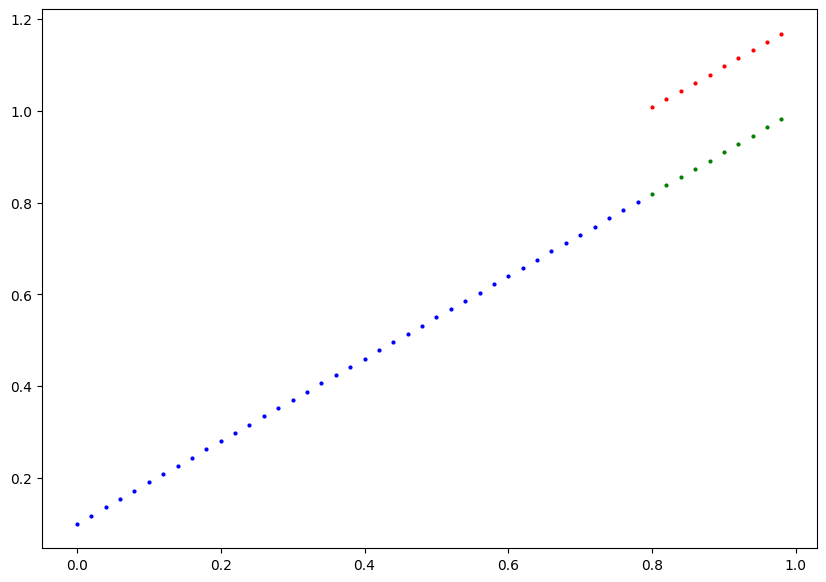

In [ ]:
plot_predictions(X_train, X_test, Y_train, Y_test, test_pred)

In [ ]:
##saving and loading the model
from pathlib import Path

#create model directory
model_path = Path("models_1")
model_path.mkdir(parents = True, exist_ok = True)

#model save path
model_name = "01_pytorch_workflow_model_1.pth"
model_save_path = model_path/ model_name

#save the model
print(f"saving the model to {model_save_path}")
torch.save(obj = model_1.state_dict(), f = model_save_path)


saving the model to models_1/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.8901]])),
             ('Linear_layer.bias', tensor([0.2960]))])

In [ ]:
#load the saved model

loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(f = model_save_path))

loaded_model_1.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.8901]])),
             ('Linear_layer.bias', tensor([0.2960]))])